# Descargar noticias de un medio digital

En esta práctica vamos a descargar los titulares de las noticias de un medio de comunicación digital

## Importar las librerías que necesitaremos

Vamos a utilizar urllib3 y Beautiful Soup

In [41]:
#!/usr/bin/env python

import urllib3, nltk
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafael.chamorromacei\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


True

## Descargar la página

Emplearemos un UserAgent (navegador) de móvil para identificarnos con la página

In [42]:
ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
h = {"User-Agent": ua}

http = urllib3.PoolManager()


#medioDigital= "http://20minutos.es"
#medioDigital= "http://www.elpais.com"
#medioDigital= "http://www.elmundo.es"
#medioDigital= "http://www.lavozdegalicia.com"

medioDigital = 'https://www.lavozdegalicia.es/noticia/galicia/2023/11/22/gobierno-fija-servicios-minimos-72-alta-velocidad-65-media-distancia-huelga-viernes/00031700667019898648133.htm'
r = http.request('GET', medioDigital, fields=None, headers=h)


## Quitar código HTML

In [43]:
web_solotexto = BeautifulSoup(r.data).get_text()

salida = ''
#excluirlineas=4

for linea in web_solotexto.split('\n'):
    aux=linea.strip()
    if aux and len(aux) > 50:
        salida += aux + '\n'
        #if not aux.startswith('Comentarios ('):
        #    excluirlineas=excluirlineas-1
        #    if (excluirlineas < 0):
        #        vartext2 = vartext2 + aux + '\n'



El Gobierno fija servicios mínimos del 72 % en alta velocidad y del 65 % en media distancia para la huelga de este viernes
BLACK FRIDAY 💥 Suscríbete por 4,95€/mes PARA SIEMPRE
El Gobierno fija servicios mínimos del 72 % en alta velocidad y del 65 % en media distancia para la huelga de este viernes
Los sindicatos creen que las circulaciones impuestas por el Ministerio de Transporte son abusivas. Los trabajadores están en contra de la segregación de las cercanías catalanas pactada por el PSOE con ERC. En Galicia se suprimirán 38 trenes
El Ministerio de Transportes ha establecido los servicios mínimos que se tendrán que cumplir durante la huelga de 24 horas en Renfe y el ADIF que arrancará este viernes, 24 de noviembre, fijando en el 72 % los servicios mínimos de alta velocidad y larga distancia, mientras que en los de media distancia -los trenes que unen A Coruña y Vigo por el eje atlántico, por ejemplo- deberán circular el 65 % de los servicios previstos en esa jornada. Solo en cercanía

In [44]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«",".","\n",">","/"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [45]:
stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma","después", "uso", "cualquier", "parte", "hace", "además", "según", "convencional", "pueden", "ser","de","y","estos","con","finalidad","que","su"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [46]:
#Reemplazamos signos de puntuación por "":
for sw in stop_words:
    clean_texto = salida.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
#clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [47]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [48]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [49]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
servicios,9
información,9
mínimos,7
distancia,7
viernes,6
destacada,6
huelga,6
renfe,6
trenes,6
actualidad,6


In [50]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

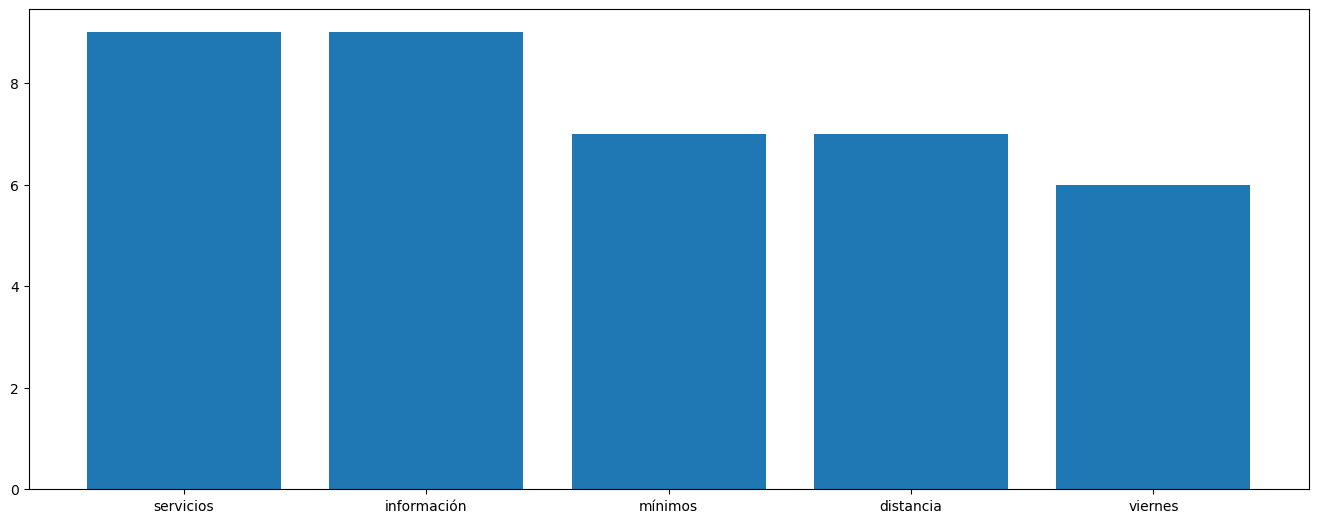

In [51]:

plot_bar(data=df, top=5)

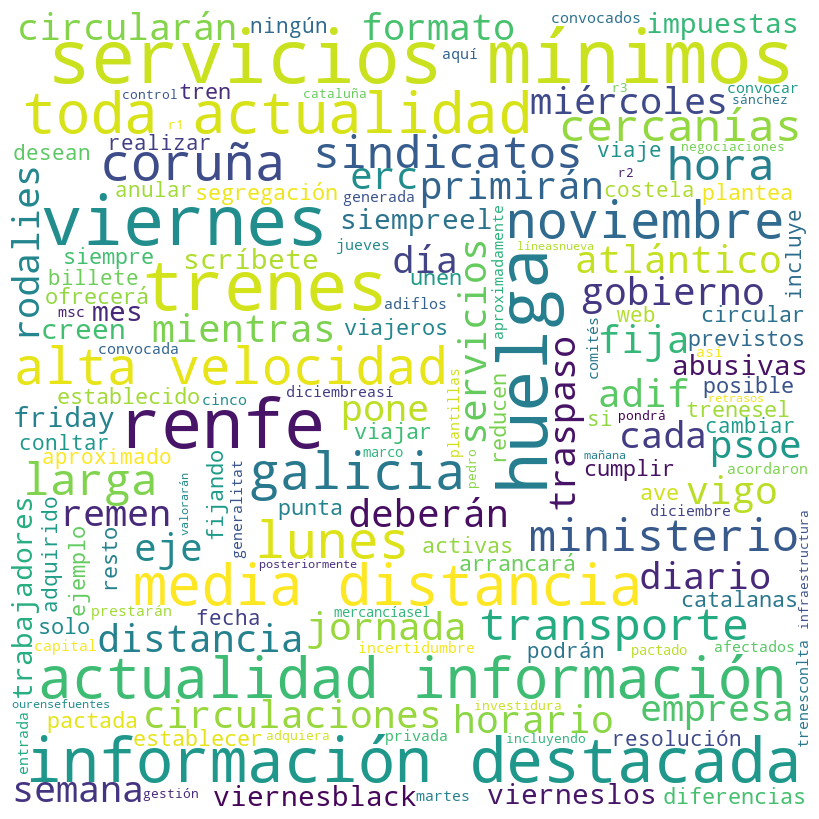

In [52]:
#word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()